In [21]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


%matplotlib inline

In [2]:
class Linear_Regression():
    
    # Initiating the parameters
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def fit(self, X, y): # Fit the model
        
        # number of data and number of features
        self.p, self.n = X.shape
        
        # Initiating the weight and bias(y-intercept and the slope)
        self.m = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
        for i in range(self.iterations):
            self.gradient_descent()
            
    def gradient_descent(self):
        y_pred = self.predict(self.X)
        
        # Calculate the derivatives
        m_derivative = -(2 * (self.X.T).dot(self.y - y_pred)) / self.p
        b_derivative = -2 * np.sum(self.y - y_pred) / self.p
        
        # Updating the values 
        self.m = self.m - self.learning_rate * m_derivative
        self.b = self.b - self.learning_rate * b_derivative
        
    def predict(self, X):
        return X.dot(self.m) + self.b  # The equations
        
        

In [3]:
# Load the data 
df = pd.read_csv('salary_data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# The shape of the data
df.shape

(30, 2)

#### Data Preprocessing

In [6]:
# Checking for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
X = df.iloc[:,:-1].values      
y = df.iloc[:,1].values

In [8]:
# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
print(X_train.shape, X_test.shape)

(21, 1) (9, 1)


In [10]:
print(y_train.shape, y_test.shape)

(21,) (9,)


In [12]:
# Training our model
model = Linear_Regression(learning_rate = 0.01, iterations = 1000)

In [13]:
# Fit our model
model.fit(X_train, y_train)

In [14]:
print('slope: ', model.m[0])
print('y-intercept: ', model.b)

slope:  9372.141864857393
y-intercept:  25709.221742972182


The equation for predicting values:

y = 9372(x) + 25709

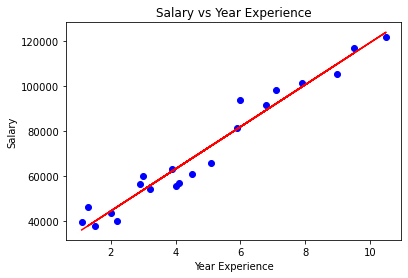

In [43]:
# Plotting actual vs predicted
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, predict, color='red')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.title('Salary vs Year Experience')
plt.show()

<AxesSubplot:>

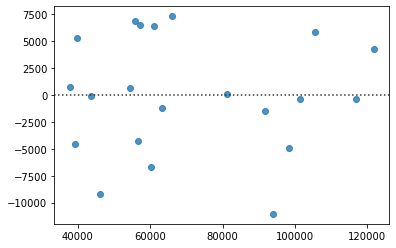

In [17]:
# Plotting residual plot
sns.residplot(x=y_train, y=predict)

In [41]:
mse_scratch_model = np.sqrt(mean_squared_error(y_train, predict))
print('The RMSE on the training dataset is:', mse_scratch_model)

The RMSE on the training dataset is: 5378.923176606924


In [42]:
mae_scratch_model = mean_absolute_error(y_train, predict)
print('The MAE on the training dataset is: ', mae_scratch_model)

The MAE on the training dataset is:  4438.659948278766


#### Linear Regression with sklearn

In [26]:
linreg = LinearRegression()

In [27]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_train)

In [36]:
# Coefficients
linreg.coef_

array([9339.08172382])

In [37]:
# Intercept
linreg.intercept_

25918.438334893217

In [38]:
# The root mean squared error (RMSE)
print('The RMSE on the training dataset is: ', np.sqrt(mean_squared_error(y_train, pred)))

# The Mean absolute error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, pred))

The RMSE on the training dataset is:  5377.937858732068
The MAE on the training dataset is:  4443.338173029783


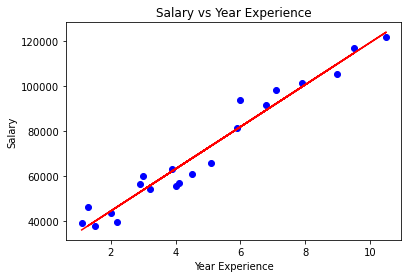

In [39]:
# Plotting actual vs predicted
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, pred, color='red')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.title('Salary vs Year Experience')
plt.show()

<AxesSubplot:>

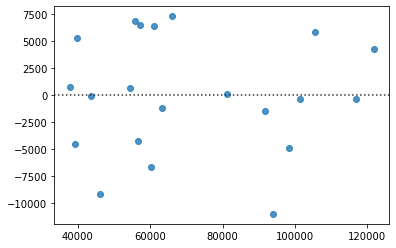

In [40]:
sns.residplot(x=y_train, y=pred)